# K-Means Clustering tutorial

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Import data

In [ ]:
data = pd.read_csv("fbref_data.csv")
data.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD\n▼,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,28,5,5,94,33,61,89,2.34,78.6,32.1,46.5,1.22,"53,249",Erling Haaland - 36,Ederson,→ Champions League via league finish
1,4,Newcastle Utd,38,19,14,5,68,33,35,71,1.87,72.0,39.6,32.4,0.85,"52,127",Callum Wilson - 18,Nick Pope,→ Champions League via league finish
2,2,Arsenal,38,26,6,6,88,43,45,84,2.21,71.9,42.0,29.9,0.79,"60,191","Martin Ødegaard, Gabriel Martinelli - 15",Aaron Ramsdale,→ Champions League via league finish
3,6,Brighton,38,18,8,12,72,53,19,62,1.63,73.3,50.2,23.1,0.61,"31,477",Alexis Mac Allister - 10,Robert Sánchez,→ Europa League via league finish
4,5,Liverpool,38,19,10,9,75,47,28,67,1.76,72.6,50.9,21.7,0.57,"53,163",Mohamed Salah - 19,Alisson,→ Europa League via league finish


Select relevant features


In [ ]:
df = data[["Rk", "xG", "xGA"]]
df.head()

,Rk,xG,xGA
0,1,78.6,32.1
1,4,72.0,39.6
2,2,71.9,42.0
3,6,73.3,50.2
4,5,72.6,50.9


Split relevant features into X and y arrays for plotting

In [ ]:
X, y = df.iloc[:, 1].values, df.iloc[:, 2].values

Show scatter plot of initial data

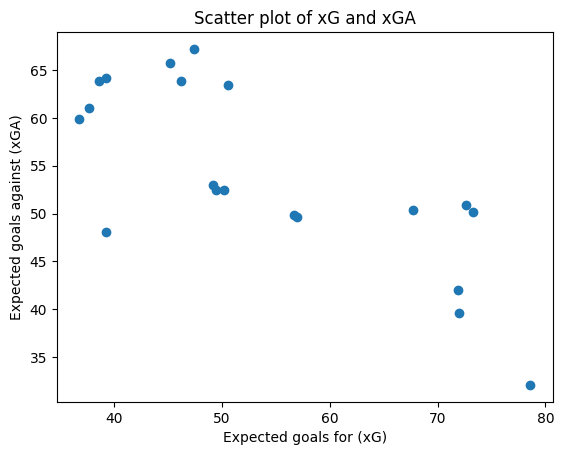

In [ ]:
plt.scatter(X, y)

plt.title("Scatter plot of xG and xGA")
plt.xlabel("Expected goals for (xG)")
plt.ylabel("Expected goals against (xGA)")

plt.show()

New variable to pass to KMeans

In [ ]:
X = df.iloc[:, 1:].values

Create model

In [ ]:
km = KMeans(n_clusters=4, n_init='auto', random_state=0)
km.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=0)

Plot clusters with centroids

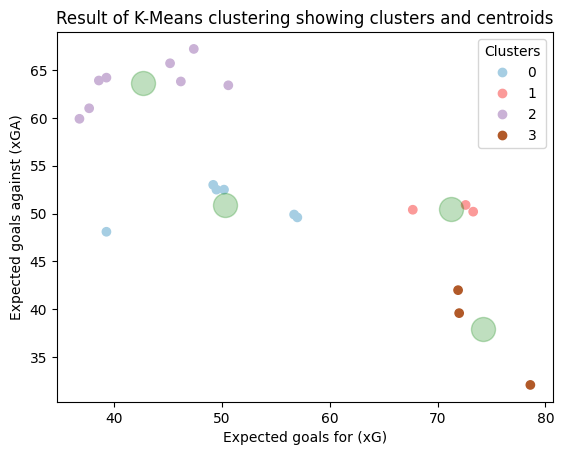

In [ ]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='Paired')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, marker='o', c='g', alpha=0.25)

plt.title("Result of K-Means clustering showing clusters and centroids")
plt.xlabel("Expected goals for (xG)")
plt.ylabel("Expected goals against (xGA)")

plt.legend(*scatter.legend_elements(), title="Clusters")

plt.show()

Iterate through the algorithm for illustrative purposes

Converged by 6 iterations


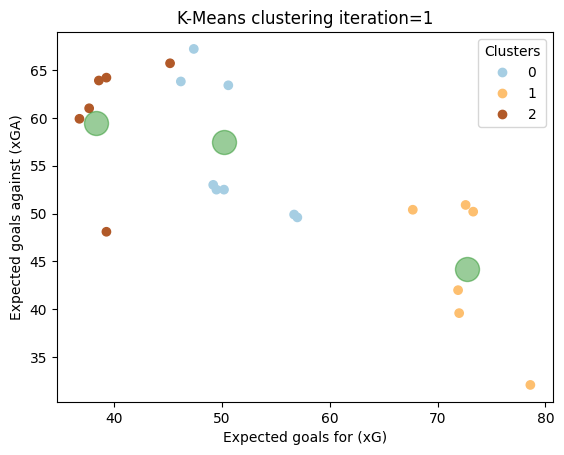

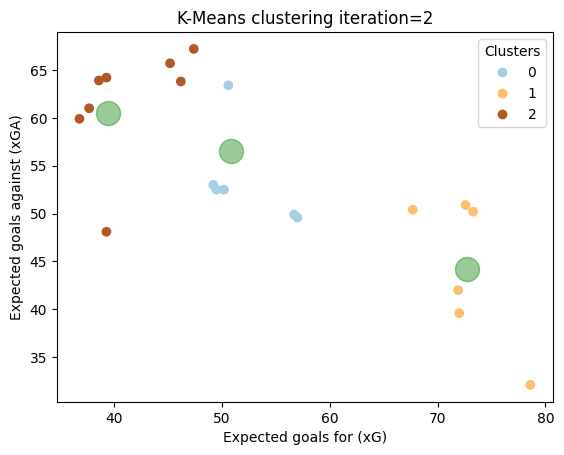

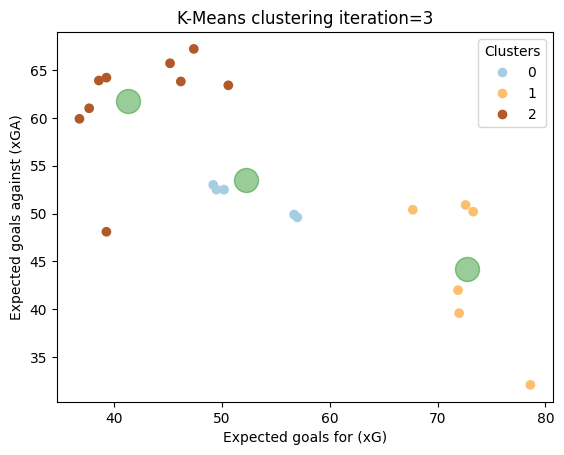

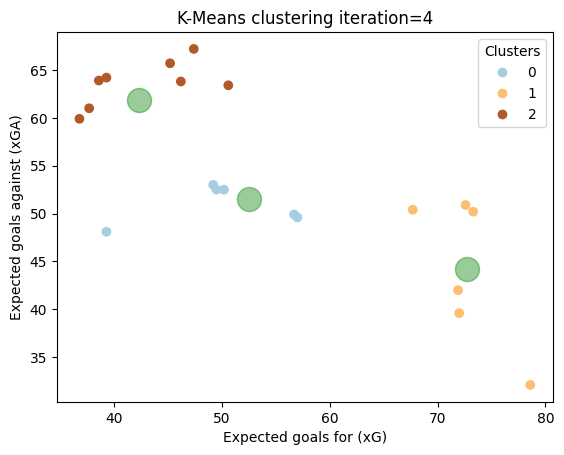

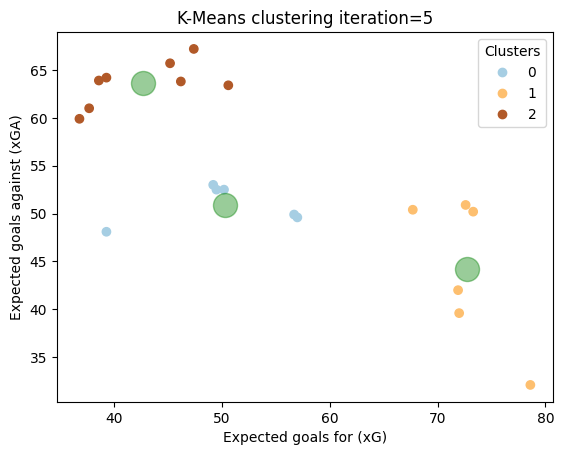

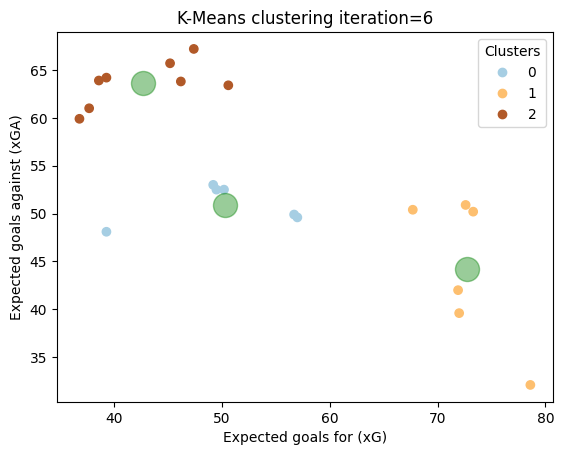

In [ ]:
coordinates = {}

for i in range(1,10):
  km = KMeans(n_clusters=3, max_iter=i, random_state=0, n_init='auto')
  km.fit(X)

  if i > km.n_iter_:
    print(f"Converged by {km.n_iter_} iterations")
    break

  coordinates[i] = km.cluster_centers_

  plt.figure()
  scatter = plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='Paired')
  plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, marker='o', c='g', alpha=0.4)
  plt.title(f"K-Means clustering iteration={km.n_iter_}")
  plt.xlabel("Expected goals for (xG)")
  plt.ylabel("Expected goals against (xGA)")

  plt.legend(*scatter.legend_elements(), title="Clusters")

In [ ]:
# Show coordinates of centroids through iterations
display(coordinates)

{1: array([[50.22222222, 57.51111111],
        [72.68333333, 44.2       ],
        [38.34      , 59.42      ]]),
 2: array([[50.85      , 56.4875    ],
        [72.68333333, 44.2       ],
        [39.48333333, 60.46666667]]),
 3: array([[52.2       , 53.48333333],
        [72.68333333, 44.2       ],
        [41.3125    , 61.725     ]]),
 4: array([[52.52      , 51.5       ],
        [72.68333333, 44.2       ],
        [42.34444444, 61.91111111]]),
 5: array([[50.31666667, 50.93333333],
        [72.68333333, 44.2       ],
        [42.725     , 63.6375    ]]),
 6: array([[50.31666667, 50.93333333],
        [72.68333333, 44.2       ],
        [42.725     , 63.6375    ]])}

Show the "Rank" i.e. finishing position of teams in each cluster.
We see that teams with high xG for and low xGA (cluster 1) have a high finishing position. This metric seems useful for predicting team performance.

In [ ]:
# Labels given to clusters
km.labels_

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
cluster_1 = df[0:6]
cluster_0 = df[6:12]
cluster_2 = df[12:]

print("Finishing position of teams")
print("Cluster '1':", cluster_1["Rk"].values)
print("Cluster '0':", cluster_0["Rk"].values)
print("Cluster '2':", cluster_2["Rk"].values)

Finishing position of teams
Cluster '1': [1 4 2 6 5 3]
Cluster '0': [ 8  9  7 12 14 11]
Cluster '2': [18 10 19 17 13 20 16 15]


How to pick K? How do we evaluate our model?

In [ ]:
# Within cluster sum of squares (WCSS)
WCSS = []

for i in range(1,8):
  km = KMeans(n_clusters=i, random_state=0, n_init='auto')
  km.fit(X)
  WCSS.append(km.inertia_)

In [ ]:
WCSS

[5379.8475,
 1562.2811904761907,
 811.32375,
 559.9820833333333,
 379.51216666666653,
 241.20166666666663,
 145.47749999999988]

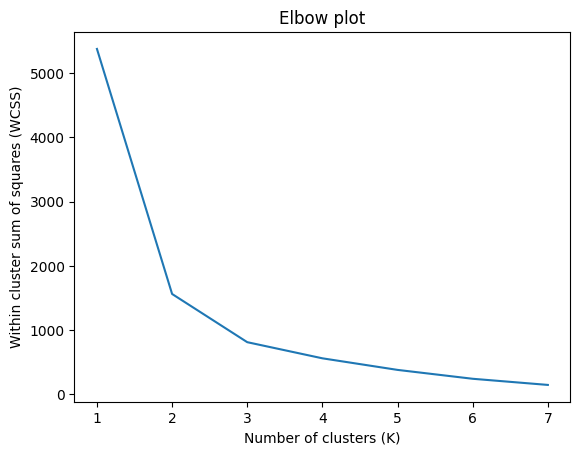

In [ ]:
plt.plot(range(1,8), WCSS)
plt.title("Elbow plot")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Within cluster sum of squares (WCSS)")

plt.show()

Therefore, 3 clusters seems to be optimum for our data.